<a href="https://colab.research.google.com/github/mdkamrulhasan/data_mining_kdd/blob/main/notebooks/Week6_EDA_Test_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test questions

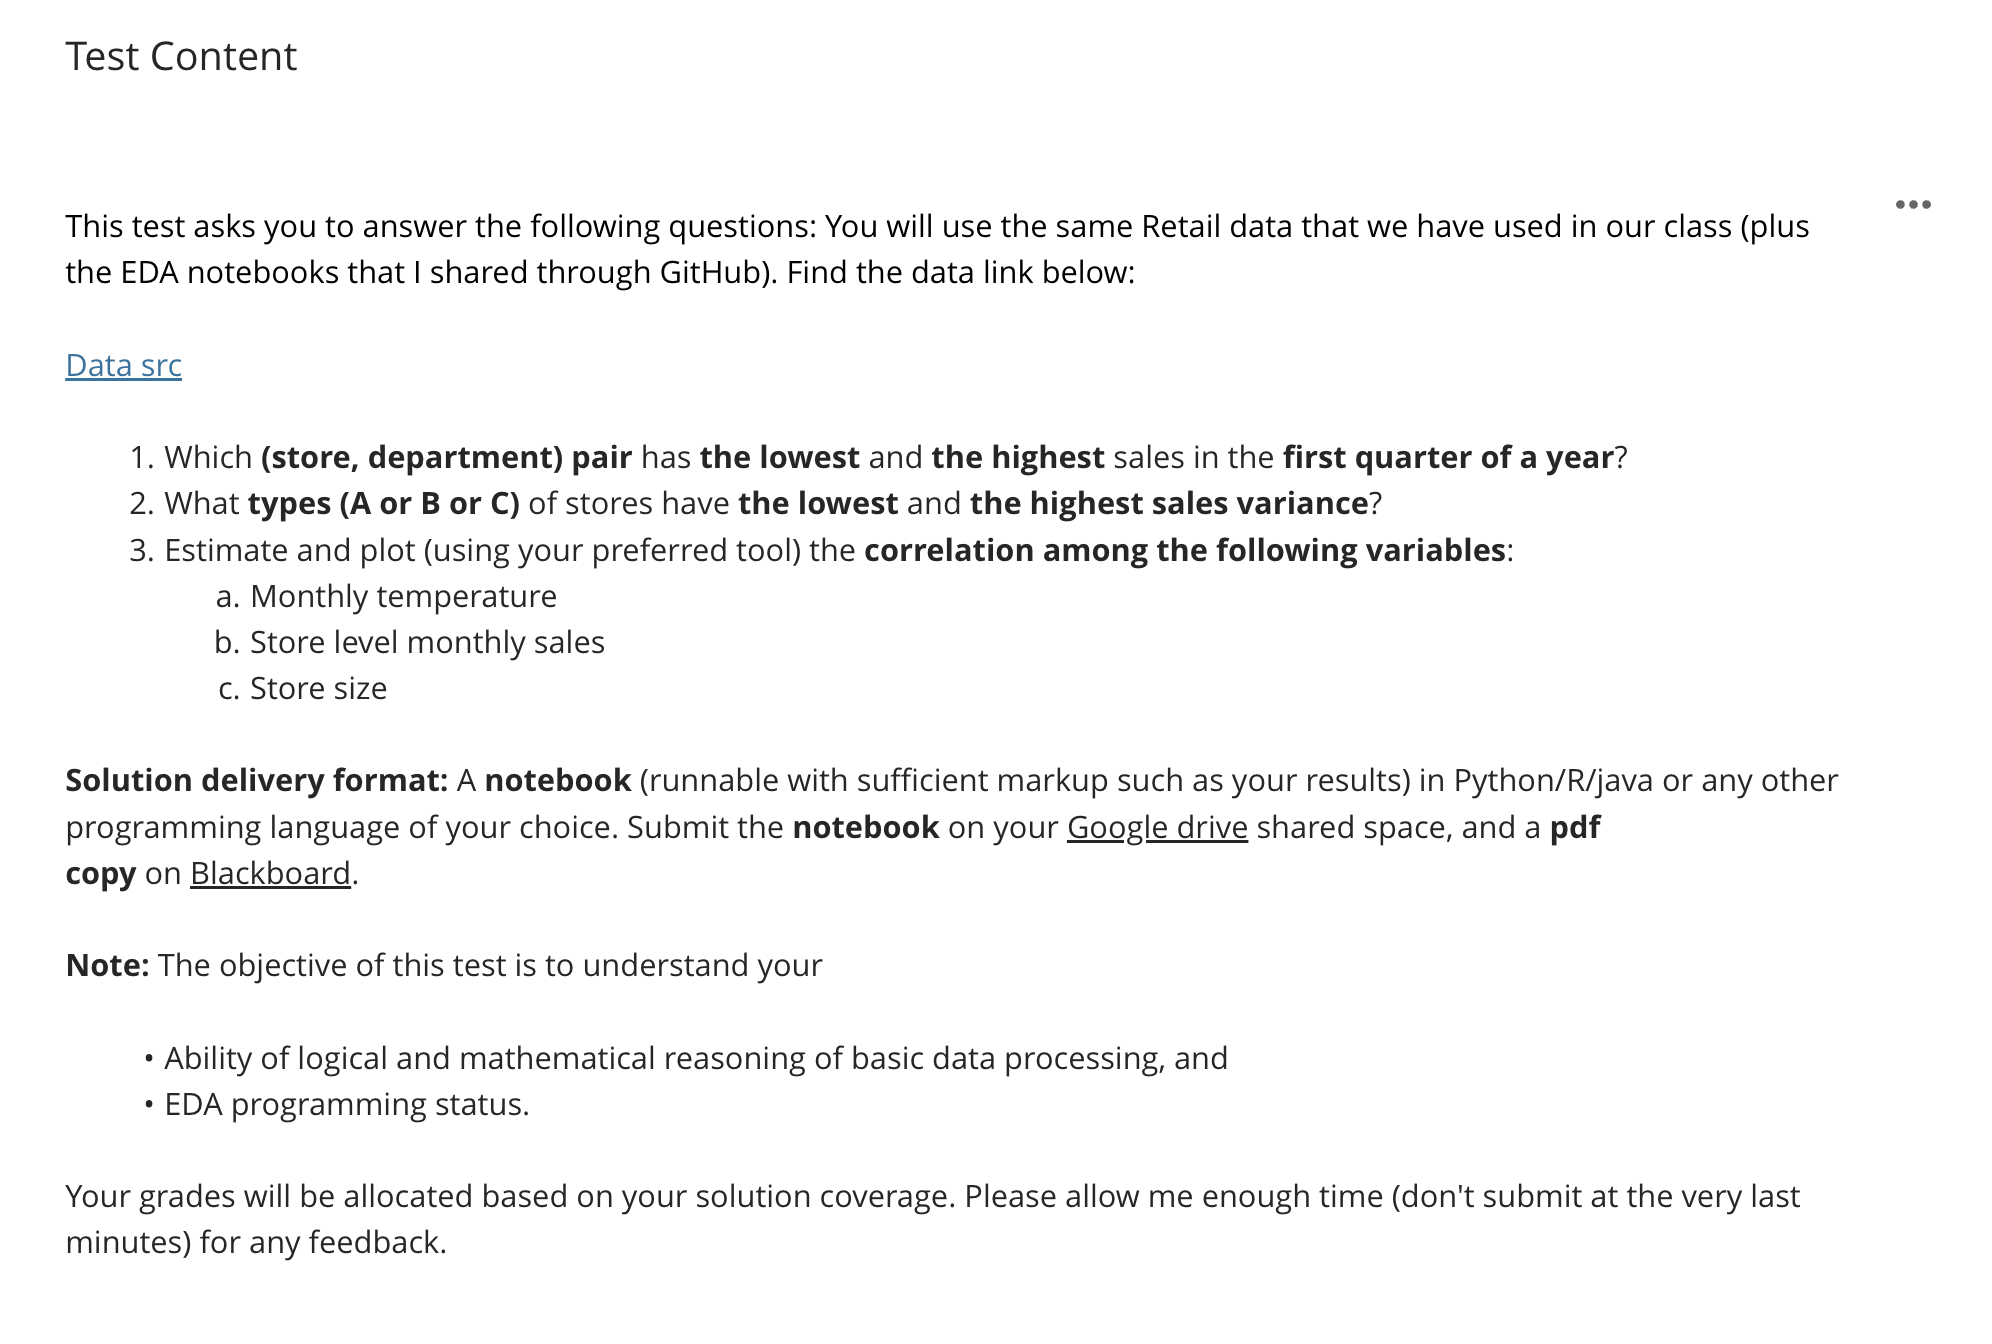

# Importing libraries

In [29]:
# data processing
import pandas as pd
import numpy as np
# visualization
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go



---



# Loading Data

In [4]:

features_url = 'https://raw.githubusercontent.com/mdkamrulhasan/data_mining_kdd/main/data/retail/Features-data-set.csv'
sales_url = 'https://raw.githubusercontent.com/mdkamrulhasan/data_mining_kdd/main/data/retail/sales-data-set.csv'
stores_url = 'https://raw.githubusercontent.com/mdkamrulhasan/data_mining_kdd/main/data/retail/stores-data-set.csv'

features = pd.read_csv(features_url)
sales = pd.read_csv(sales_url)
stores = pd.read_csv(stores_url)
features.shape, sales.shape, stores.shape

((8190, 12), (421570, 5), (45, 3))

Lets have a first look of the data in each table

In [5]:
features.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [6]:
sales.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True


In [7]:
stores.head(2)

,Store,Type,Size
0,1,A,151315
1,2,A,202307


Converting Date to DateTime format


In [8]:
features['Date'] = pd.to_datetime(features.Date , format="%d/%m/%Y")
sales['Date'] = pd.to_datetime(sales.Date , format="%d/%m/%Y")

In [ ]:
sales.Date.nunique(), features.Date.nunique()

(143, 182)

Q1: Which (store, department) pair has the lowest and the highest sales in the first quarter of a year?

In [9]:
# Filtering for quater 1 sales only
sales['Qt'] = sales.Date.dt.quarter
qt1_sales = sales[sales.Qt == 1]

In [10]:
# Grouping per Store and Dept
qt1_sales_gp = qt1_sales.groupby(['Store', 'Dept']).agg({'Weekly_Sales': 'sum'})

In [11]:
# The Minimum
qt1_sales_gp.loc[qt1_sales_gp.idxmin()]

,,Weekly_Sales
Store,Dept,
16,47,-2138.08


In [12]:
# The Maximum
qt1_sales_gp.loc[qt1_sales_gp.idxmax()]

,,Weekly_Sales
Store,Dept,
14,92,6242263.75


Q2: What types (A or B or C) of stores have the lowest and the highest sales variance?

In [14]:
store_sales = stores.merge(sales, on='Store', how='inner')
store_sales.head(2)

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Qt
0,1,A,151315,1,2010-02-05,24924.50,False,1
1,1,A,151315,1,2010-02-12,46039.49,True,1


In [16]:
store_sales_var = store_sales.groupby('Type').agg({'Weekly_Sales': 'var'})
store_sales_var.loc[store_sales_var.idxmin()], store_sales_var.loc[store_sales_var.idxmax()]

(      Weekly_Sales
 Type              
 C     2.555315e+08,
       Weekly_Sales
 Type              
 A     6.981991e+08)

Q3: Estimate and plot (using your preferred tool) the correlation among the following variables:


*   Monthly temperature
*   Store level monthly sales
*   Store size(Correlation among montly sales, temperature, and store size)





In [17]:
# Get the month labels
#sales['Month'] = sales.Date.dt.month
store_sales['Month'] = store_sales.Date.dt.month
features['Month'] = features.Date.dt.month

### Store montly sales: I am using aggregation function: 'sum'; you can also use 'average'; however, you have to be extra careful:

Here the average is a 2 step process:


*  First do the montly sum, then
*  Divide by the number of weeks (as your data is at the weekly level sum)


***Note: The same goes for the other aggregations (such as temperature and size)***

In [18]:
store_sales_month = store_sales.groupby(['Store', 'Month']).agg(
    {'Weekly_Sales': 'sum'
    }
).reset_index()

In [19]:
# store montly size
# We may have stores changing their floor size based on seasons
store_size_month = store_sales.groupby(['Store', 'Month']).agg(
    {'Size': 'sum'
    }
).reset_index()

In [21]:
# store montly temperautre
store_temp_month = features.groupby(['Store', 'Month']).agg(
    {'Temperature': 'sum'
    }
).reset_index()

Merge all aggregated dataframes into one

In [30]:
correlation_data_table = store_sales_month.merge(
    store_size_month, on=['Store', 'Month']).merge(
        store_temp_month, on=['Store', 'Month'])
correlation_data_table.head(2)

,Store,Month,Weekly_Sales,Size,Temperature
0,1,1,11203741.49,86552180,565.79
1,1,2,19505306.58,131190105,786.48


Estimate and display correlations

<Axes: >

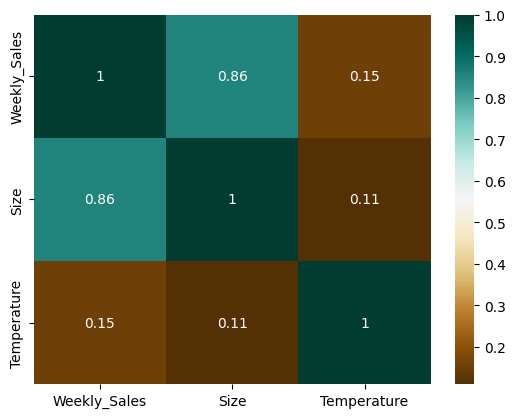

In [28]:
c = correlation_data_table[['Weekly_Sales', 'Size', 'Temperature']].corr()
sns.heatmap(c,cmap="BrBG",annot=True)